In [15]:
import numpy as np
import pandas as pd
import os
import re

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *
init_notebook_mode(connected = True)

from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import SnowballStemmer
from nltk import WordNetLemmatizer

In [16]:
#Get all csv files in current directory
#get_filelist = [f for f in os.listdir(os.curdir) if f.endswith(".csv")]

In [17]:
#get_filelist

In [18]:
#files = get_filelist[:17]

In [19]:
#allfile_df = pd.concat([pd.read_csv(f) for f in files])

In [20]:
#allfile_df.shape

In [21]:
#allfile_df = allfile_df.drop_duplicates()

In [22]:
#allfile_df.to_csv('indeed_scraped_jobs.csv', index = False)

In [23]:
df = pd.read_csv('indeed_scraped_jobs.csv')

In [24]:
df.shape

(25833, 14)

In [25]:
for c in df:
    print(c, '\n', 'uniques:', df[c].nunique(), '\n', ('*'*40))

Title 
 uniques: 8634 
 ****************************************
Location 
 uniques: 1423 
 ****************************************
Company 
 uniques: 4076 
 ****************************************
Salary 
 uniques: 663 
 ****************************************
Summary 
 uniques: 11136 
 ****************************************
Description 
 uniques: 24154 
 ****************************************
Review 
 uniques: 2318 
 ****************************************
benefit_rating 
 uniques: 37 
 ****************************************
comp_rating_overall 
 uniques: 35 
 ****************************************
culture_rating 
 uniques: 39 
 ****************************************
job_description 
 uniques: 5764 
 ****************************************
jsecurity_rating 
 uniques: 41 
 ****************************************
mgmt_rating 
 uniques: 40 
 ****************************************
wl_bal_rating 
 uniques: 36 
 ****************************************


In [26]:
#Setting all 'None' strings to None obejct type
df.replace('None', np.nan, inplace = True)
np.sum(df.isnull())

Title                      0
Location               12233
Company                    1
Salary                 23533
Summary                    1
Description                0
Review                  7112
benefit_rating          7073
comp_rating_overall     7000
culture_rating          7074
job_description          110
jsecurity_rating        7074
mgmt_rating             7073
wl_bal_rating           7073
dtype: int64

In [27]:
#Removing rows where location is missing
#Removing rows where job description is missing
#Removing summary column as it is a summary of job description
#Removing Description link column and Review link column as both contain links
#Leaving the rest of the columns for now
df = df.loc[df['Location'].notnull(), :]
df = df.loc[df['job_description'].notnull(), :]
df = df.drop(['Summary','Description','Review'] , axis = 1)

In [28]:
#finding empty values 
np.sum(df.isnull())

Title                      0
Location                   0
Company                    0
Salary                 12458
benefit_rating          3115
comp_rating_overall     3042
culture_rating          3116
job_description            0
jsecurity_rating        3116
mgmt_rating             3115
wl_bal_rating           3115
dtype: int64

In [29]:
df.reset_index(drop = True, inplace = True)

In [30]:
df.head(3)

,Title,Location,Company,Salary,benefit_rating,comp_rating_overall,culture_rating,job_description,jsecurity_rating,mgmt_rating,wl_bal_rating
0,Data Scientist,"Tampa, FL",Hillsborough County,"\r\r\r\r\n $67,808 - $108,514 a...",3.6,3.8,3.7,Hillsborough County is looking for a Data Scie...,3.6,3.5,3.8
1,Data Scientist,"Tampa, FL",Net2Source,NaN,3.5,3.6,4.2,Job SummaryPosition: Data ScientistLocation: T...,4.0,3.7,3.8
2,Data Scientist,"Tampa, FL","Hillsborough County, FL","\r\r\r\r\n $67,808 - $108,514 a...",3.6,3.8,3.7,Desired: Machine LearningRSQLT-SQLPL/SQLMATLAB...,3.6,3.5,3.8


In [31]:
df.tail(3)

,Title,Location,Company,Salary,benefit_rating,comp_rating_overall,culture_rating,job_description,jsecurity_rating,mgmt_rating,wl_bal_rating
13575,Lab Assistant / Phlebotomist,"Berkeley, CA",University of California Berkeley,\r\r\r\n $22.62 - $25.98 an hour,3.8,4.2,4.1,"About Berkeley The University of California,...",3.6,3.8,4.0
13576,Senior Data Scientist,"San Francisco, CA",Sano,NaN,NaN,NaN,NaN,Sano is developing a novel sensor for continuo...,NaN,NaN,NaN
13577,"Scientist, Toxicology","San Francisco, CA",Nektar,NaN,2.7,3.0,3.3,"Participates in the design, implemention and a...",2.7,3.0,3.3


In [32]:
df.shape

(13578, 11)

In [33]:
df1 = df.copy()
df2 = df.copy()

In [34]:
print("Number of unique locations:{}".format(df1['Location'].nunique()))
#replacing location by one of the 30 locations queried

Number of unique locations:1423


In [35]:
df1

,Title,Location,Company,Salary,benefit_rating,comp_rating_overall,culture_rating,job_description,jsecurity_rating,mgmt_rating,wl_bal_rating
0,Data Scientist,"Tampa, FL",Hillsborough County,"\r\r\r\r\n $67,808 - $108,514 a...",3.6,3.8,3.7,Hillsborough County is looking for a Data Scie...,3.6,3.5,3.8
1,Data Scientist,"Tampa, FL",Net2Source,NaN,3.5,3.6,4.2,Job SummaryPosition: Data ScientistLocation: T...,4.0,3.7,3.8
2,Data Scientist,"Tampa, FL","Hillsborough County, FL","\r\r\r\r\n $67,808 - $108,514 a...",3.6,3.8,3.7,Desired: Machine LearningRSQLT-SQLPL/SQLMATLAB...,3.6,3.5,3.8
3,Data Scientist,"Tampa, FL",BICP,"\r\r\r\r\n $120,000 - $170,000 ...",5.0,5.0,5.0,"BICP, a market leader in Advanced Analytics, D...",4.5,5.0,5.0
4,Statistical Data Analyst,"Tampa, FL",University of South Florida,"\r\r\r\r\n $51,500 - $60,000 a ...",3.6,4.2,4.0,Position Details Department Number/Name: 0-...,3.5,3.8,4.1
5,RESEARCH DATA SPECIALIST,"Tampa, FL 33612",Moffitt Cancer Center,NaN,3.8,4.0,3.8,Moffitt Cancer Center is internationally recog...,3.6,3.5,3.9
6,Data Scientist,"Tampa, FL 33625",Convergence Consulting Group,NaN,NaN,NaN,NaN,Are you an analytics leader passionate about h...,NaN,NaN,NaN
7,Data Scientist,"Tampa, FL",Booz Allen Hamilton,NaN,3.9,3.9,3.7,Data Scientist Key Role: Leverage technical an...,3.4,3.5,3.9
8,Data Scientist,"Tampa, FL",Energy Sense Finance,NaN,NaN,NaN,NaN,"Do you like sun, solar and everything Data – a...",NaN,NaN,NaN
9,Biological Scientist,"Tampa, FL",University of South Florida,"\r\r\r\r\n $32,000 - $38,500 a ...",3.6,4.2,4.0,Position Details Department Number/Name: 0-...,3.5,3.8,4.1


# Checkpoint 1

In [36]:
df1.to_csv('checkpoint1.csv', index = False)

In [37]:
df2 = pd.read_csv('checkpoint1.csv')

In [38]:
def get_city_state(df,col):
    df = df.join(df[col].str.split(',', 1, expand=True).rename(columns={0:'City', 1:'State'}))
    df['City'] = df['City'].astype(str)
    df['State'] = df['State'].astype(str)
    df['State'] = [x[0:3] for x in df['State'] if x != None]
    df.drop(['Location'], axis = 1, inplace = True)
    return df

In [39]:
df2 = get_city_state(df2, 'Location')

In [40]:
df2

,Title,Company,Salary,benefit_rating,comp_rating_overall,culture_rating,job_description,jsecurity_rating,mgmt_rating,wl_bal_rating,City,State
0,Data Scientist,Hillsborough County,"\r\r\r\r\r\n $67,808 - $108,514...",3.6,3.8,3.7,Hillsborough County is looking for a Data Scie...,3.6,3.5,3.8,Tampa,FL
1,Data Scientist,Net2Source,NaN,3.5,3.6,4.2,Job SummaryPosition: Data ScientistLocation: T...,4.0,3.7,3.8,Tampa,FL
2,Data Scientist,"Hillsborough County, FL","\r\r\r\r\r\n $67,808 - $108,514...",3.6,3.8,3.7,Desired: Machine LearningRSQLT-SQLPL/SQLMATLAB...,3.6,3.5,3.8,Tampa,FL
3,Data Scientist,BICP,"\r\r\r\r\r\n $120,000 - $170,00...",5.0,5.0,5.0,"BICP, a market leader in Advanced Analytics, D...",4.5,5.0,5.0,Tampa,FL
4,Statistical Data Analyst,University of South Florida,"\r\r\r\r\r\n $51,500 - $60,000 ...",3.6,4.2,4.0,Position Details Department Number/Name: 0-...,3.5,3.8,4.1,Tampa,FL
5,RESEARCH DATA SPECIALIST,Moffitt Cancer Center,NaN,3.8,4.0,3.8,Moffitt Cancer Center is internationally recog...,3.6,3.5,3.9,Tampa,FL
6,Data Scientist,Convergence Consulting Group,NaN,NaN,NaN,NaN,Are you an analytics leader passionate about h...,NaN,NaN,NaN,Tampa,FL
7,Data Scientist,Booz Allen Hamilton,NaN,3.9,3.9,3.7,Data Scientist Key Role: Leverage technical an...,3.4,3.5,3.9,Tampa,FL
8,Data Scientist,Energy Sense Finance,NaN,NaN,NaN,NaN,"Do you like sun, solar and everything Data – a...",NaN,NaN,NaN,Tampa,FL
9,Biological Scientist,University of South Florida,"\r\r\r\r\r\n $32,000 - $38,500 ...",3.6,4.2,4.0,Position Details Department Number/Name: 0-...,3.5,3.8,4.1,Tampa,FL


In [41]:
#Including only the top 30 cities in the analysis
city_list = list(df2['City'].value_counts().head(30).index)

In [42]:
#Visualizing jobs in each state
df_statewisejobs = pd.DataFrame(df2['State'].value_counts()).reset_index()
df_statewisejobs.columns = ['State', 'Listings']
df_statewisejobs = df_statewisejobs[~df_statewisejobs.State.str.contains('Non')]


bar_layout = Layout(
    barmode='group',
    height=500,
    width=800,
    xaxis=dict(tickangle=0),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title = 'Job Listings in each state'
)

graph_data = []

#py.offline.iplot(Figure(data=graph_data, layout=bar_layout), filename='Skillsets1')
graph_data = [go.Bar(
            x=df_statewisejobs['State'],
            y=df_statewisejobs['Listings']
    )]

py.offline.iplot(Figure(data=graph_data, layout=bar_layout), filename='statewise_overalljobs-barplot')


In [43]:
#Reading a csv of cities with distance around 50 miles
city_df = pd.read_csv('city_list.csv')
city_df.head(5)
#merging present datafrme with city list to assign jobs to nearest big city
df3 = pd.merge(df2, city_df, how = 'left', left_on = 'City', right_on = 'City')
df3 = df3.assign(city=df3.centre1.fillna(df3.City))
#Visualizing jobs by nearest big city
df3_citywise = pd.DataFrame(df3['city'].value_counts())
df_bycity = df3[['City','city']] 
print(df_bycity.loc[df_bycity['City'] != df_bycity['city']].loc[df_bycity['city'] == 'San Francisco'].drop_duplicates())

#All cities about 10 miles away from San Francisco assigned to San Francisco

                        City           city
1215     South San Francisco  San Francisco
1239               San Bruno  San Francisco
1258                 Alameda  San Francisco
1263              Burlingame  San Francisco
1264  San Francisco Bay Area  San Francisco
1280               San Ramon  San Francisco
5629               Daly City  San Francisco


## Checkpoint 2

In [44]:
df3.to_csv('jobs_cleaned1.csv', index = False)

In [45]:
df = pd.read_csv('jobs_cleaned1.csv')
print(df.shape)
df.columns

(13578, 14)


Index(['Title', 'Company', 'Salary', 'benefit_rating', 'comp_rating_overall',
       'culture_rating', 'job_description', 'jsecurity_rating', 'mgmt_rating',
       'wl_bal_rating', 'City', 'State', 'centre1', 'city'],
      dtype='object')

In [46]:
df.head(1)

,Title,Company,Salary,benefit_rating,comp_rating_overall,culture_rating,job_description,jsecurity_rating,mgmt_rating,wl_bal_rating,City,State,centre1,city
0,Data Scientist,Hillsborough County,"\r\r\r\r\r\r\n $67,808 - $108,5...",3.6,3.8,3.7,Hillsborough County is looking for a Data Scie...,3.6,3.5,3.8,Tampa,FL,NaN,Tampa


In [47]:
cities = (pd.DataFrame(df['city'].value_counts().head(50).index)).rename(columns={0:'city'})

In [48]:
#Choosing only those values in top 50 cities
df = df.loc[df['city'].isin(cities['city'])]

In [49]:
#saving results into csv
df.to_csv('jobs_cleaned2.csv', index = False)

In [50]:
df = pd.read_csv('jobs_cleaned2.csv')

In [51]:
df.rename(columns={'Title':'title', 'Company':'company', 'job_description':'description','Salary':'salary',\
                  'wl_bal_rating' : 'worklife_rating', 'comp_rating_overall':'benefit_rating',\
                  'jsecurity_rating': 'jobsecurity_rating', 'mgmt_rating': 'mgmt_rating', \
                   'culture_rating': 'culture_rating', 'comp_rating_overall':'overall_rating'}, inplace = True)

In [52]:
df.drop(['City', 'State', 'centre1'], axis = 1, inplace = True)

In [53]:
#replace all empty spaces by one empty space
df['description'] = df['description'].apply(lambda x: re.sub('\s+', ' ', x))

In [54]:
#Searching for skillsets in job descriptions
Languages={'R':'(?<=[\W])R(?=[\W])', 'Python':'python', 'Java': 'java', 'Ruby':'ruby','Bash':'bash',\
              'VBA':'vba', 'CSS':'css', 'Javascript':"JAVA-?\s?SCRIPT", 'Scala': 'scala','C':'(?<=[\W])C(?=[\W])',\
             'HTML':'html', 'Perl':'perl', 'SQL':'sql'}

Packages = {'Pandas':'pandas', 'Numpy': 'numpy', 'Scipy':'scipy', 'Scikit Learn':'[Ss]cikit|[Ss]klearn', \
            'Matplotlib':'matplotlib','Seaborn':'seaborn','Plotly':'plotly','Bokeh':'bokeh','NLTK': 'nltk', \
            'ggplot':'ggplot', 'dplyr': 'dplyr'}

Databases={ 'Oracle':'oracle', 'MongoDB':'mongodb', 'MySQL':'mysql', 'PostgreSQL':'postgresql', \
             'SQL Server':'sql server', 'Cassandra':'cassandra'}


Bigdata={'Hadoop': '[Hh]adoop', 'Spark':'[Ss]park', 'AWS':'AWS|[Aa]mazon [Ww]eb [Ss]ervice', 'Hive':'[Hh]ive',\
                    'Pig':'[Pp]ig'}

Softwares={'SAS':'SAS','Matlab':'matlab', 'Tableau':'tableau','TensorFlow':'tensor( ?)flow',\
                          'Excel':'(?<=[\W])Excel(?=[\W])','Stata': 'stata','H2O':'h2o', \
           'BI':'BI|[Bb]usiness [Ii]ntelligence'}

OS={'Linux': 'linux','windows':'windows', 'mac':'mac'}


Skills = {'Machine Learning':'ML|[Mm]achine [lL]earning', 'Data Visualization':'[Vv]isualization',\
            'Deep Learning':'[Dd]eep [Ll]earning','AI':'AI|[Aa]rtificial [Ii]nteligence',\
            'Neural Network':'[Nn]eural ?[Nn]et','NLP':'[Nn]atural [Ll]anguage [Pp]rocessing|NLP',\
            'Predictive Modeling':'[Pp]redictive [Mm]odel', 'Web Scraping':'([Ww]eb)?[Ss]crap',\
            'Decision Tree':'[Tt]ree', 'Random Forest':'[F]orest','Clustering':'[[Cc]luster'}

tool_casesensitive=['R','SAS', 'C', 'SPSS', 'BI', 'C/C++','Data Visualization','Web Scraping']

combined_skillsets = {'Languages':Languages, 'Packages': Packages, 'Databases': Databases, 'Softwares':Softwares,\
                'OS':OS, 'Bigdata':Bigdata, 'Skills':Skills }

skillset_df={}

for element, skill_dict in combined_skillsets.items():
    for skill in skill_dict:
        df[skill]= df.description.str.contains(skill_dict[skill], case = (skill in tool_casesensitive or skill=='Skills'))
    skillset_df[element] = (pd.DataFrame(df.loc[:,skill_dict.keys()].apply(pd.value_counts).\
                                           loc[True].sort_values(ascending=False)))

    
for c in combined_skillsets.keys():
    print('Category',":",c)
    print(pd.DataFrame(skillset_df[c]))
    print('\n')

C:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



Category : Languages
            True
Python      4851
R           4096
SQL         3452
Java        2507
C           1999
Scala       1990
Javascript   829
Perl         700
HTML         549
CSS          398
Bash         209
Ruby         188
VBA          108


Category : Packages
              True
Scikit Learn   488
Pandas         351
Numpy          254
Scipy          136
Matplotlib      92
ggplot          71
NLTK            65
Plotly          40
Seaborn         31
dplyr           16
Bokeh           15


Category : Databases
            True
Oracle       532
MySQL        349
SQL Server   321
Cassandra    245
MongoDB      210
PostgreSQL   187


Category : Softwares
            True
BI          2264
Excel       1881
SAS         1393
Matlab      1026
Tableau      893
TensorFlow   776
Stata        233
H2O          102


Category : OS
         True
mac      5888
Linux    1031
windows   568


Category : Bigdata
        True
AWS     2236
Spark   1709
Hadoop  1677
Hive     995
Pig      420




In [55]:
layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

bar_layout = Layout(
    barmode='group',
    height=500,
    width=700,
    xaxis=dict(tickangle=-45),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    legend=dict(x=1)
)

graph_data = []

skills1 = {'Languages':Languages, 'Bigdata': Bigdata, 'OS':OS }

for a, skill_dict in skills1.items():
    graph_data.append(go.Bar(
        x = list(skillset_df[a].index),
        y = list(skillset_df[a][1]),
        name = a))

py.offline.iplot(Figure(data=graph_data, layout=bar_layout), filename='Skillsets1')

In [56]:
layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

bar_layout = Layout(
    barmode='group',
    height=500,
    width=700,
    xaxis=dict(tickangle=-30),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    legend=dict(x=1)
)

graph_data = []

skills2 = {'Skills':Skills, 'Bigdata':Bigdata}

for a, skill_dict in skills2.items():
    graph_data.append(go.Bar(
        x = list(skillset_df[a].index),
        y = list(skillset_df[a][1]),
        name = a))

py.offline.iplot(Figure(data=graph_data, layout=bar_layout), filename='Skillsets1')

In [57]:
layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

bar_layout = Layout(
    barmode='group',
    height=400,
    width=500,
    xaxis=dict(tickangle=-30),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title = 'Softwares'
)

graph_data = []

skills3 = {'Softwares': Softwares}

for a, skill_dict in skills3.items():
    graph_data.append(go.Bar(
        x = list(skillset_df[a].index),
        y = list(skillset_df[a][1]),
        name = a))

py.offline.iplot(Figure(data=graph_data, layout=bar_layout), filename='Skillsets1')

In [58]:
layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,100,15,10)'
)

bar_layout = Layout(
    barmode='group',
    height=400,
    width=500,
    xaxis=dict(tickangle=-40),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title = 'Packages'
)

graph_data = []

skills4 = {'Packages': Packages}

for a, skill_dict in skills4.items():
    graph_data.append(go.Bar(
        x = list(skillset_df[a].index),
        y = list(skillset_df[a][1]),
        name = a))

py.offline.iplot(Figure(data=graph_data, layout=bar_layout), filename='Skillsets1')

In [59]:
#########################################################################################

In [60]:
df.to_csv('datacleaning1.csv', index = False)

In [143]:
df = pd.read_csv('datacleaning1.csv')

In [4]:
#Jobs in top 15 cities
jobs_city = pd.DataFrame(df['city'].value_counts().sort_values(ascending=False)).reset_index().head(20)
jobs_city.columns = ['city','count']
jobs_city = df.loc[df['city'].isin(jobs_city.city), :]

In [5]:
#Skills per city
skills_per_city={'R':'(?<=[\W])R(?=[\W])', 'Python':'python', 'SAS':'SAS', 'SQL':'sql', 'Tableau':'tableau',\
          'TensorFlow':'tensor( ?)flow', 'Java': 'java', 'Hadoop': 'hadoop',\
        'Scala': 'scala', 'C':'(?<=[\W])C(?=[\W])', 'Spark':'spark',\
          'AWS':'AWS|[Aa]mazon [Ww]eb [Ss]ervice', 'H2O':'h2o', 'BI':'BI',\
          'Hive':'hive', 'Pig':'pig', 'MongoDB':'mongodb',\
          'Scikit Learn':'scikit', 'Javascript':"JAVA-?\s?SCRIPT"}

data = pd.pivot_table(jobs_city, index=['city'], values=skills_per_city.keys(), aggfunc=[np.mean])
data.columns = data.columns.droplevel()

In [7]:

plot_data = [go.Heatmap( 
    x=data.columns,
    y=data.index,
    z=data.values.tolist(),
    colorscale='Jet')]

heat_map_layout = Layout(
    margin=go.layout.Margin(
        l=150,
        pad=4
    ),
    height=500,
    width=800,
    xaxis=dict(tickangle=-60),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    
)

py.offline.iplot(Figure(data=plot_data, layout=heat_map_layout), filename='heatmap_skills_cities')

In [24]:
#######################################


In [25]:

city_list = df['city'].unique().tolist()

df['corp'] = df['description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['corp'] = df['corp'].apply(lambda x: re.sub('[^\w\s]','', x))




stop = stopwords.words('english') + ['year', 'relevant', 'andor','race','color', 'applicant','opportunity','marital',\
                                     'status','gender','religion','etc', 'identity', 'expression', 'clinical', 'trial'
                                     'including', ' sexual','sexual', 'sex', 'must', 'include','well', 'need', 'various',\
                                     'orientation', 'charge', 'de', 'la', 'year', 'responsibility','experience', 'equal', \
                                     'employer', 'employment','national', 'origin','without', 'regard', 'program', 'support',\
                                     'use', 'provide', 'appropriate','user', 'closely', 'work', 'role', 'internal', 'external',\
                                     'track','record',
                                    'based', 'required', 'company', 'working', 'ensure', 'ability', 'organization',\
                                     'successful','candidate', 'scientist','computer', 'best','practice',\
                                     'applicant','application', 'within', 'qualified','applicant','training',\
                                     'related', 'field'] + city_list

df['corp'] = df['corp'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [26]:
stemmer = SnowballStemmer("english")
lem = WordNetLemmatizer()
text = ''.join(df['corp'])
text = ' '.join([lem.lemmatize(word) for word in text.split()])

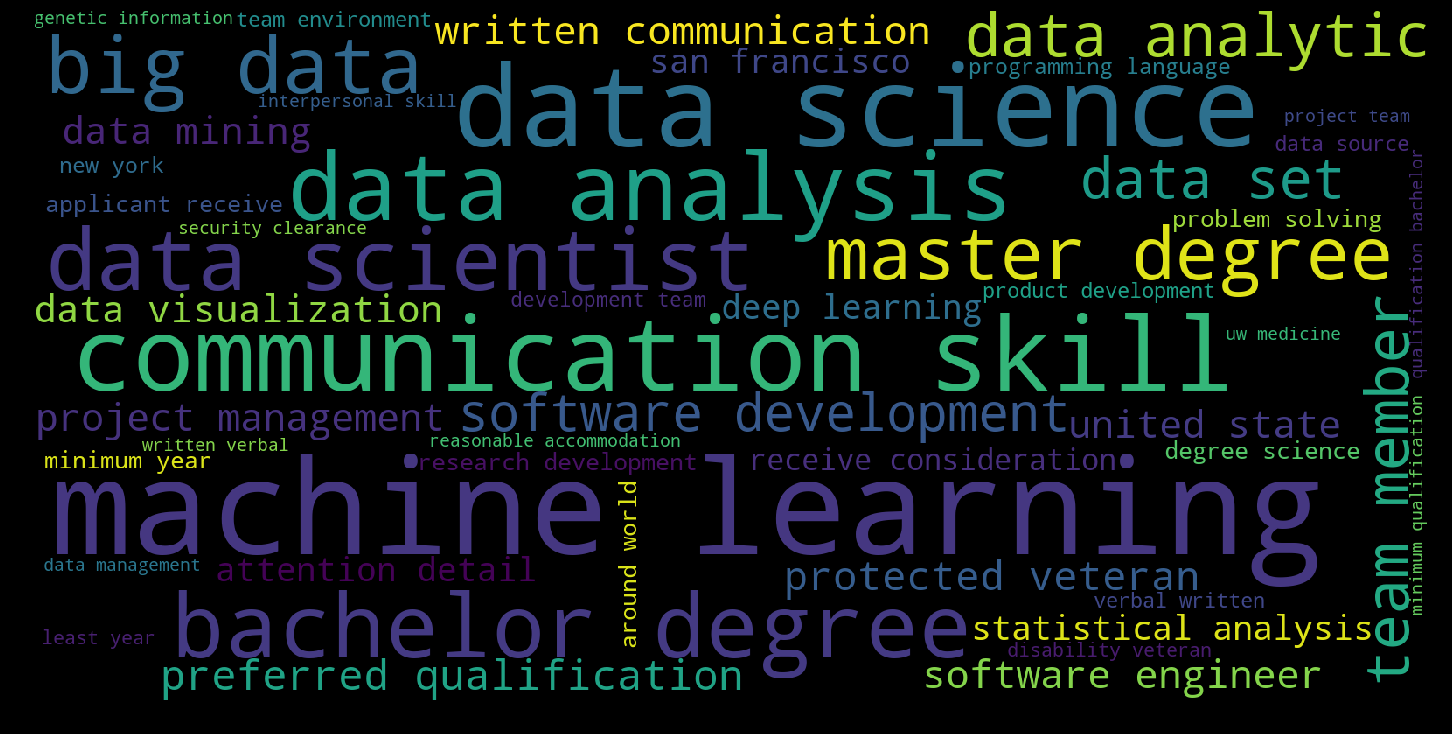

In [27]:
wordcloud = WordCloud(width=1600, height=800, max_words=50).generate(text)
# Open a plot of the generated image.
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [28]:
# degrees

degree_re={'PHD':'(?<=[\W])phd(?=[\W])|ph.d|[Dd]octorate|[Pp]ost graduate','Masters':'[Mm]asters|MS|M.S'\
           ,'Bachelors':'[Bb]achelor|BS|BA|B.A'}

degree_case_sensitive=['Masters','Bachelors']

for degree in degree_re:
    df[degree]=df.description.str.contains(degree_re[degree], case= degree in degree_case_sensitive)

In [29]:
#Finding the jobs based on graduate degree 
df_degree = pd.DataFrame(100*(df[['PHD', 'Masters', 'Bachelors']].sum(axis=0)/len(df))).reset_index()
df_degree.columns = ['degree', 'percent']
df_degree.sort_values(by='percent', ascending = False).reset_index(drop = True)

,degree,percent
0,Bachelors,52.206397
1,Masters,36.672115
2,PHD,33.348899


In [30]:
graph_data = []

#py.offline.iplot(Figure(data=graph_data, layout=bar_layout), filename='Skillsets1')
graph_data = [go.Bar(
            x=df_degree['degree'],
            y=df_degree['percent']
    )]

py.offline.iplot(Figure(data=graph_data, layout=bar_layout), filename='degree-barplot')

NameError: name 'bar_layout' is not defined

In [31]:
df.to_csv('data_cleaned_0912.csv', index = False)

In [179]:
df = pd.read_csv('data_cleaned_0912.csv')

In [180]:
df.shape

(12849, 72)

In [181]:
#is the role related to data science 
role ={'role_relevance': 'ML|[Mm]achine [lL]earning|[Dd]ata [Ss]cien|[Aa]nalytics|[Ss]tatistic'}

for position in role:
    df[position]=df.title.str.contains(role[position])

In [182]:
df_datascience_roles = df.loc[df['role_relevance'], :]
roles = pd.DataFrame(df_datascience_roles['title'].value_counts().head(20)).reset_index()
roles.columns = ['datascience_roles', 'count']

In [183]:
bar_layout = Layout(
    barmode='group',
    height=500,
    width=900,
    xaxis=dict(tickangle=-20),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title = 'Datascience Roles'
)

graph_data = []

#py.offline.iplot(Figure(data=graph_data, layout=bar_layout), filename='Skillsets1')
graph_data = [go.Bar(
            x=roles['datascience_roles'],
            y=roles['count']
    )]

py.offline.iplot(Figure(data=graph_data, layout=bar_layout), filename='roles-barplot')

In [184]:
# Top hiring companies for data scientists in the top25 hiring cities
top_jobs_company = df_datascience_roles.groupby(['company']).size().reset_index(name='count').sort_values(by=['count'], ascending=False).head(25)
data = [go.Bar(
            x=top_jobs_company['company'],
            y=top_jobs_company['count']
    )]

py.offline.iplot(Figure(data=data, layout=bar_layout), filename='company-jobs')

In [185]:
# Number of postings for the top 25 cities
by_city = df_datascience_roles.groupby(['city']).size().reset_index(name='count')
top_10_cities = by_city.sort_values(by=['count'], ascending=False).head(10)
top_10_cities = list(top_10_cities.city)

In [186]:
graph_data = []
i=1
for city in top_10_cities:
    job_count_by_company = df_datascience_roles[df_datascience_roles['city']==city].groupby(['company']).\
                        size().reset_index(name='count')
    top_3_companies_in_city = job_count_by_company.sort_values(by=['count'], ascending=False).head(3)

    graph_data.append(go.Bar(
        x = list(top_3_companies_in_city['company']+'-'+str(i)),
        y = list(top_3_companies_in_city['count']),
        name = city))
    i+=1

bar_layout = Layout(
    width=1200,
    height=600,
    xaxis=dict(tickangle=-40),
    barmode='group',
    margin=go.layout.Margin(
        b=150,
        pad=4
    ),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)
py.offline.iplot(Figure(data=graph_data, layout=bar_layout), filename='top10_hirin_companies')

# Look at Salary

In [187]:
df.to_csv('dataprep_for_salaryprocessing.csv', index = False)
df = pd.read_csv('dataprep_for_salaryprocessing.csv')

In [188]:
df = df[df['salary'] != 'None'].drop_duplicates()
df = df.loc[df['salary'].notnull(), :]
#.drop_duplicates().dropna()

In [189]:
df = df[df.salary.str.contains("hour") == False]
df = df[df.salary.str.contains("month") == False]

In [190]:
df.shape

(864, 73)

In [191]:
def get_mean_salary(df, col):
    df[col].replace({'\$':''}, regex = True, inplace = True)
    df[col].replace(regex=True,inplace=True,to_replace=r'\D',value=r' ')
    df[col] = df[col].str.strip()
    df[col] = df[col].str.replace(' ',',')
    df = df.join(df[col].str.split(',,,', 1, expand=True).rename(columns={0:'min', 1:'max'}))
    df['min'] = df['min'].str.replace(',','')
    df['max'] = df['max'].str.replace(',','')
    df['min'] = df['min'].str.replace(' ','')
    df['min'] = df['min'].astype('float64')
    df['max'] = df['max'].str.replace(' ','')
    df['max'] = df['max'].astype('float64')
    df.drop(['salary'], axis = 1, inplace = True)
    df['salary'] = df[['min', 'max']].mean(axis=1)
    df.drop(['min','max'], axis=1, inplace = True)
    return df

In [192]:
df = get_mean_salary(df, 'salary')

In [193]:
data = [go.Histogram(x=df['salary'])]
hist_layout = Layout(
    width=600,
    height=400,
    title = 'Salary histogram')
py.offline.iplot(Figure(data=data, layout=hist_layout), filename='salary histogram')

In [194]:
city_salary = df['city'].value_counts().sort_values(ascending=False).head(10).index.values.tolist()
graph_data = []

for city in city_salary:
        salary_box = df.loc[df['city']==city, 'salary']
        #g_city_country =(df[df['city']==city]['country'])
        city_box = df.loc[df['city']==city,'city']
        
        graph_data.append(go.Box(
                x = city_box,
                y = salary_box,
                name = city))            

In [196]:
box_layout = Layout(
    yaxis=layout.YAxis(
        zeroline=False
    ),
    height = 500,
    width = 700,
    boxmode='group',
    xaxis=dict(tickangle=-40),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    showlegend=False
)

fig = Figure(data=graph_data, layout=box_layout)

py.offline.iplot(fig, filename='salary_by_city')

In [ ]:
#Modelling salary ???????